Based on [Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-dependence-plots/) and [XGBoost](https://www.kaggle.com/dansbecker/learning-to-use-xgboost/) tutorials from [Kaggle Machine Learning](https://www.kaggle.com/learn/machine-learning), and Machine Learning Mastery's [XGBoost article](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/).

## Partial Dependence Plots

Partial dependence plots are useful in extracting insights from complex models by showing how each variable or predictor affects the model's predictions.

In [7]:
import pandas as pd
from sklearn.preprocessing import Imputer

feature_names = ['Distance', 'Landsize', 'BuildingArea']

def get_housing_data():
    cols_to_use = feature_names
    data = pd.read_csv('melb_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    
    return imputed_X, y

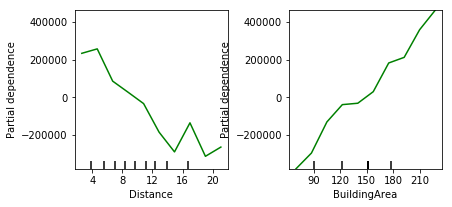

In [13]:
%matplotlib inline  
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

X, y = get_housing_data()
clf =  GradientBoostingRegressor(n_estimators=10).fit(X, y)
fig, axs = plot_partial_dependence(model, features=[0, 2], X=X, feature_names=feature_names, grid_resolution=10)

Observations: In general, the closer the building is to the city center (shortest distance), the higher its market price. The larger the building area, the higher its market price.